In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist, cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, ZeroPadding2D, GlobalAveragePooling2D, Activation
from keras import backend as K
import scipy
import numpy as np
import matplotlib.pyplot as plt

import PIL
from PIL import Image
import imagehash
import matplotlib.pyplot as plt
from keras.preprocessing import image
import glob
from sklearn.utils import shuffle


batch_size = 128
num_classes = 10
epochs = 20

/home/aminov/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
pics0 = glob.glob("../data/*")
pics1 = glob.glob("../data2/*")
pics2 = glob.glob("../data3/*.jpg")
pics_nf = pics1#[:1000]
pics_nf = shuffle(pics_nf)

pics_f = pics2
pics_f = shuffle(pics_f)

In [5]:
W = 200

In [6]:
def open_img(path):
    img = Image.open(path)
    vec = image.img_to_array(img.resize((W,W)))
    return vec / 255

In [7]:
x_train = []
y_train = []

for pf, pnf in zip(pics_f, pics_nf):
    x = open_img(pf)
    if x.shape == (200, 200, 3):
        x_train.append(x)
        y_train.append(1)
    
    x_train.append(open_img(pnf))
    y_train.append(0)

x_train = np.array(x_train)
y_train = np.array(y_train)

In [8]:
x_train.shape

(2000, 200, 200, 3)

In [19]:
def ConvBlock(model, layers, filters):
    for i in range(layers):
        model.add(ZeroPadding2D((2, 2)))
        model.add(Conv2D(filters, (3, 3), activation='relu'))
        model.add(BatchNormalization(axis=3))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

def create_model():

    model = Sequential()

    # Input image: 75x75x3
    model.add(keras.layers.Lambda(lambda x: x, input_shape=(None, None , 3)))
    ConvBlock(model, 1, 32)
    # 37x37x32
    ConvBlock(model, 1, 64)
    # 18x18x64
    ConvBlock(model, 1, 128)
    # 9x9x128
    ConvBlock(model, 1, 256)
    # 4x4x128
    ConvBlock(model, 1, 512)
    # 4x4x128
    model.add(ZeroPadding2D((2, 2)))
    model.add(Conv2D(1, (3, 3), activation='relu'))
    model.add(GlobalAveragePooling2D())
    # 4x4x2
    model.add(Activation('sigmoid'))

    return model

In [23]:
model = create_model()
model.compile(loss='mse', optimizer=keras.optimizers.Adam(lr=0.0003), metrics=['accuracy'])


In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_5 (Lambda)            (None, None, None, 3)     0         
_________________________________________________________________
zero_padding2d_25 (ZeroPaddi (None, None, None, 3)     0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, None, None, 32)    896       
_________________________________________________________________
batch_normalization_21 (Batc (None, None, None, 32)    128       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, None, None, 32)    0         
_________________________________________________________________
zero_padding2d_26 (ZeroPaddi (None, None, None, 32)    0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, None, None, 64)    18496     
__________

In [26]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=500,
          verbose=1)

Epoch 1/500
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1263 - acc: 0.9545
Epoch 2/500
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1262 - acc: 0.9650
Epoch 3/500
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1265 - acc: 0.9490
Epoch 4/500
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1263 - acc: 0.9595
Epoch 5/500
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1263 - acc: 0.9590
Epoch 6/500
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1264 - acc: 0.9560
Epoch 7/500
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1264 - acc: 0.9540
Epoch 8/500
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1263 - acc: 0.9700
Epoch 9/500
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1263 - acc: 0.9680
Epoch 10/500
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1260 - acc: 0.9625
Epoch 11/500
2000/2

2000/2000 [==============================] - 6s 3ms/step - loss: 0.1252 - acc: 0.9860
Epoch 166/500
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1252 - acc: 0.9860
Epoch 167/500
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1251 - acc: 0.9900
Epoch 168/500
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1252 - acc: 0.9905
Epoch 169/500
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1252 - acc: 0.9935
Epoch 170/500
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1252 - acc: 0.9905
Epoch 171/500
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1252 - acc: 0.9850
Epoch 172/500
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1252 - acc: 0.9940
Epoch 173/500
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1251 - acc: 0.9930
Epoch 174/500
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1251 - acc: 0.9945
Epoch 175/500


2000/2000 [==============================] - 6s 3ms/step - loss: 0.1251 - acc: 0.9980
Epoch 248/500
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1251 - acc: 0.9970
Epoch 249/500
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1251 - acc: 0.9890
Epoch 250/500
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1251 - acc: 0.9980
Epoch 251/500
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1251 - acc: 0.9955
Epoch 252/500
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1251 - acc: 0.9910
Epoch 253/500
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1251 - acc: 0.9980
Epoch 254/500
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1250 - acc: 0.9975
Epoch 255/500
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1251 - acc: 0.9930
Epoch 256/500
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1251 - acc: 0.9965
Epoch 257/500


2000/2000 [==============================] - 6s 3ms/step - loss: 0.1250 - acc: 0.9980
Epoch 330/500
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1250 - acc: 0.9975
Epoch 331/500
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1250 - acc: 0.9990
Epoch 332/500
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1250 - acc: 0.9985
Epoch 333/500
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1250 - acc: 0.9995
Epoch 334/500
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1250 - acc: 0.9960
Epoch 335/500
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1250 - acc: 0.9990
Epoch 336/500
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1250 - acc: 0.9990
Epoch 337/500
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1250 - acc: 0.9960
Epoch 338/500
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1250 - acc: 0.9950
Epoch 339/500


2000/2000 [==============================] - 6s 3ms/step - loss: 0.1250 - acc: 0.9975
Epoch 412/500
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1250 - acc: 1.0000
Epoch 413/500
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1250 - acc: 1.0000
Epoch 414/500
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1250 - acc: 0.9970
Epoch 415/500
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1250 - acc: 0.9990
Epoch 416/500
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1250 - acc: 0.9965
Epoch 417/500
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1250 - acc: 0.9985
Epoch 418/500
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1250 - acc: 0.9995
Epoch 419/500
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1250 - acc: 0.9960
Epoch 420/500
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1251 - acc: 0.9935
Epoch 421/500


2000/2000 [==============================] - 6s 3ms/step - loss: 0.1250 - acc: 0.9980
Epoch 494/500
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1250 - acc: 1.0000
Epoch 495/500
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1250 - acc: 0.9990
Epoch 496/500
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1250 - acc: 0.9980
Epoch 497/500
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1250 - acc: 0.9995
Epoch 498/500
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1250 - acc: 0.9975
Epoch 499/500
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1250 - acc: 0.9995
Epoch 500/500
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1250 - acc: 0.9985


In [27]:
score = model.evaluate(x_train, y_train, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.12500524711608887
Test accuracy: 1.0


In [28]:
l = model.layers
conv_fn = K.function([l[0].input, K.learning_phase()], [l[-3].output])

In [29]:
def get_cm(inp, label):
    conv = np.rollaxis(conv_fn([inp,0])[0][0],2,0)[label]
    return scipy.misc.imresize(conv, (W,W), interp='nearest')

In [30]:
def info_img (im_idx):
    if (y_train[im_idx] == 1.0):
        img_type = 'eblo'
    else:
        img_type = 'ne_eblo'
    inp = np.expand_dims(x_train[im_idx], 0)
    img_guess = np.round(model.predict(inp)[0],2)
    if (img_guess[0] > 0.5):
        guess_type = 'eblo'
    else:
        guess_type = 'ne_eblo'
    cm0 = get_cm(inp, 0)
#     cm1 = get_cm(inp, 1)
    print ('truth: {}'.format(img_type))
    print ('guess: {}, prob: {}'.format(guess_type, img_guess))
    plt.figure(1,figsize=(30,30))
    plt.subplot(121)
    plt.imshow(x_train[im_idx])
    plt.imshow(cm0, cmap="cool", alpha=0.5)
#     plt.subplot(122)
#     plt.title('Bergness')
#     plt.imshow(x_train[im_idx])
#     plt.imshow(cm1, cmap="cool", alpha=0.5)
    plt.show()

/home/aminov/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  after removing the cwd from sys.path.


truth: eblo
guess: eblo, prob: [1.]


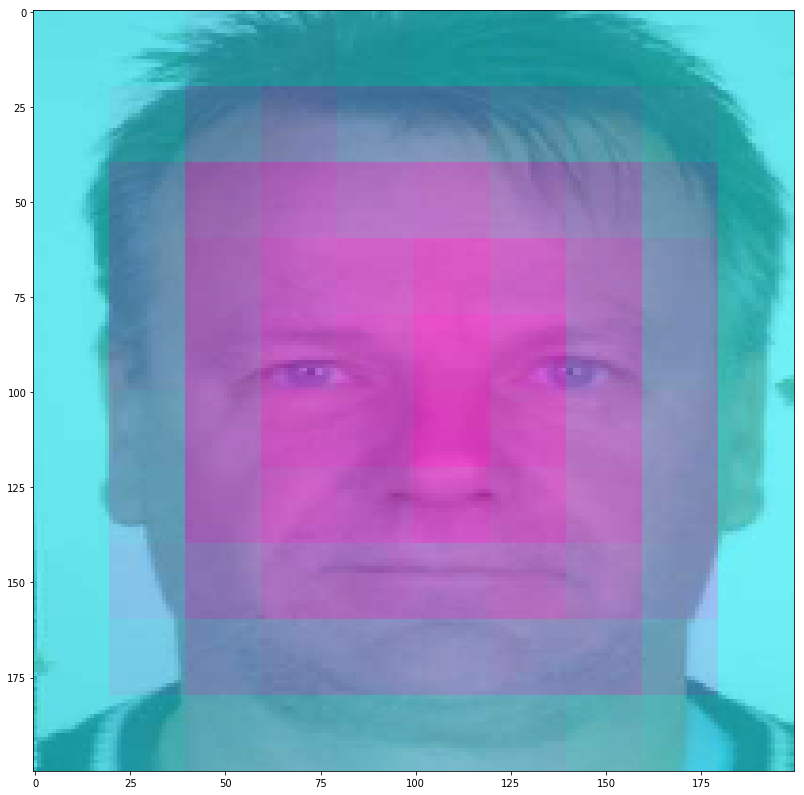

In [31]:
info_img(0)


In [32]:
# model.save('classive.h5')
# model.save_weights('weights.h5')
from keras.models import load_model
model = load_model('classive.h5')
model.load_weights('weights.h5')

## -----------------------------------------------

In [126]:
img = Image.open('trump1.jpg')
# img = Image.open(pics_nf[754])
vec = image.img_to_array(img)
vec = vec / 255
h,w = img.size

In [127]:
inp = np.expand_dims(vec, 0)
img_guess = np.round(model.predict(inp)[0],2)
img_guess

array([1.], dtype=float32)

In [128]:
l = model.layers
conv_fn = K.function([l[0].input, K.learning_phase()], [l[-3].output])

def get_cm(inp, label):
    conv = np.rollaxis(conv_fn([inp,0])[0][0],2,0)[label]
    return scipy.misc.imresize(conv, (w,h))  #, interp='nearest'

In [129]:
inp = np.expand_dims(vec, 0)
np.rollaxis(conv_fn([inp,1])[0][0],2,0)[0].shape

(20, 35)

/home/aminov/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  import sys


guess: eblo, prob: [1.]


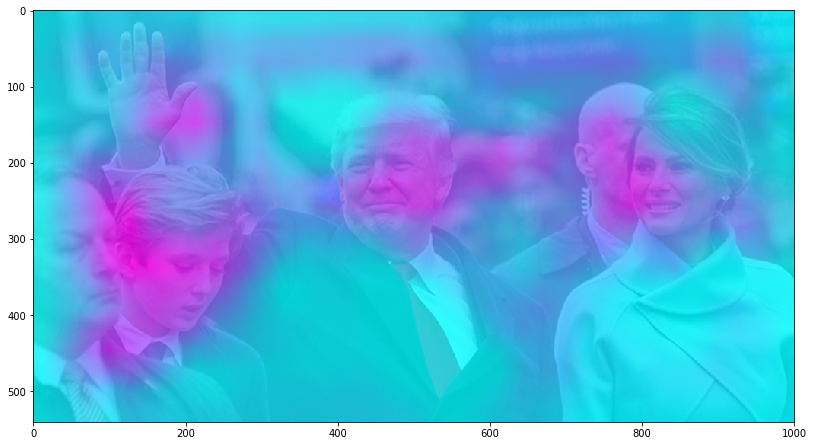

In [135]:
# if (1 == 1.0):
#     img_type = 'iceberg'
# else:
inp = np.expand_dims(vec, 0)
img_guess = np.round(model.predict(inp)[0],2)
if (img_guess[0] > 0.5):
    guess_type = 'eblo'
else:
    guess_type = 'ne_eblo'
cm0 = get_cm(inp, 0)
# cm1 = get_cm(inp, 1)
print ('guess: {}, prob: {}'.format(guess_type, img_guess))
plt.figure(1,figsize=(30,30))
plt.subplot(121)
plt.imshow(vec)
plt.imshow(cm0, cmap="cool",  alpha=0.8)
# plt.subplot(122)
# plt.imshow(vec)
# plt.imshow(cm1, cmap="cool",  alpha=0.7)
plt.show()